# Original plan was to use the FGVCx competition dataset

https://github.com/visipedia/fgvcx_fungi_comp

Though there are actually very few images, and many of the mushroom classes are not found in the UK

I therefore created an image scraper to pull hundreds of images from various search engines, using search terms extracted from a UK mushroom identification database

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import tarfile
import glob
import os
import time

## Initial Download of the competition dataset

In [2]:
directory = 'C://Users//danie//Documents//DW//Shrooms//shroom_comp//'


data = ["train_val_annotations", "test_information", "fungi_test", "fungi_train_val"]

errors = 'fungi_train_val\\images\\12665_Cortinarius_uliginosus f. uliginosus \\JM2009PIC22142605.JPG'

In [3]:
tarsefiles = False

if tarsefiles is True:
    for idx, dataset in enumerate(data):

        data_dir = directory + dataset

        print(data_dir)

        with tarfile.open(data_dir + '.tgz', 'r:gz') as opened_targz_file:
            try:
                opened_targz_file.extractall(data_dir)
            except FileNotFoundError as error:
                errors.append(error)
                print(error)

### Images

In [ ]:
image_directory = directory + data[-1] + '//images//'

shroom_folder_size = []
shroom_folder = None

for dirpath, dirnames, filenames in os.walk(image_directory):
    
    if shroom_folder is None:
        shroom_folder = dirnames
    
    shroom_folder_size.append(len(filenames))

In [5]:
df_images = pd.Series(dict(zip(shroom_folder, shroom_folder_size))).sort_values(ascending=False)
df_images.head()

14435_Gymnopus_dryophilus          342
14069_Fuligo_leviderma             329
14963_Hymenoscyphus_fructigenus    219
14454_Gyromitra_esculenta          197
47767_Schizophyllum_amplum         196
dtype: int64

### The majority of classes have fewer than 100 images, very little chance of good performance

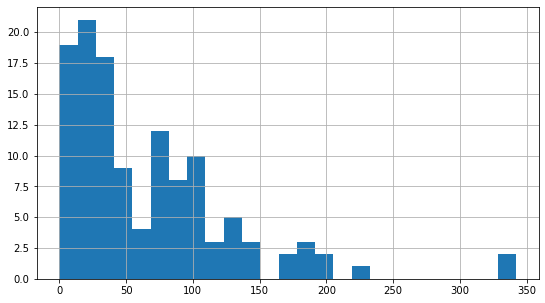

In [6]:
plt.figure(figsize=(9,5))
_ = df_images.hist(bins=25)